<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/imdb_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# from https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
x_train.shape

(25000, 10000)

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")




In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [7]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 76ms/step - loss: 0.5353 - accuracy: 0.7607 - val_loss: 0.3984 - val_accuracy: 0.8627
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3222 - accuracy: 0.8934 - val_loss: 0.3184 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2406 - accuracy: 0.9181 - val_loss: 0.2799 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1941 - accuracy: 0.9355 - val_loss: 0.2764 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1617 - accuracy: 0.9469 - val_loss: 0.2759 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1391 - accuracy: 0.9547 - val_loss: 0.2858 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1163 - accuracy: 0.9653 - val_loss: 0.3054 - val_accuracy: 0.8834
Epoch 8/20
30

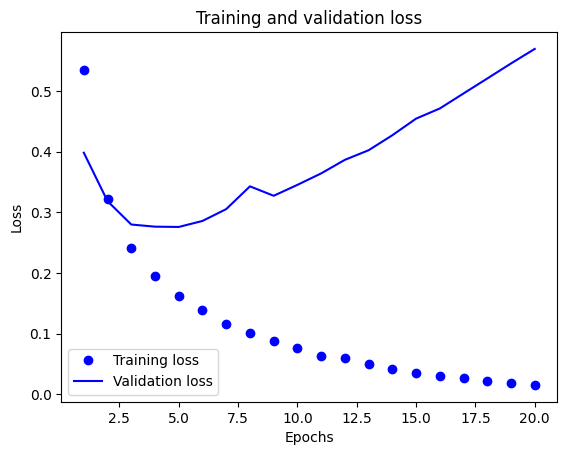

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

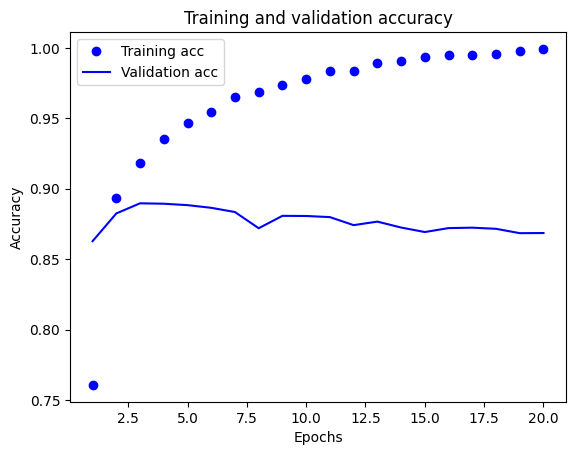

In [11]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()